In [ ]:
# ! python -m scripts.run-mace --map="baseline_1" --output_file="baseline_1"
# ! python -m scripts.run-mace --map="baseline_2" --output_file="baseline_2"

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
[02/24/25 13:11:26] INFO     INFO:__main__:Preparing map          ]8;id=792074;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py\run-mace.py]8;;\:]8;id=112698;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py#64\64]8;;\
                             environment: baseline_1                            
                    INFO     INFO:__main__:Starting manual        ]8;id=558994;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py\run-mace.py]8;;\:]8;id=944511;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py#69\69]8;;\
                             control                                            
pressed right
step=1, reward=0.00
pressed up
step=2, reward=0.00
pressed up
step=3, reward=0.00
pressed up
step=4, reward=0.00
pressed up
step=5, reward=0.00
pressed up
step=6, reward=0.00
pressed up
s

In [8]:
import ehc_sn as ehc
import matplotlib.pyplot as plt
import numpy as np

In [9]:
episode_1 = np.load("data/baseline_1.npy", allow_pickle=True)
episode_2 = np.load("data/baseline_2.npy", allow_pickle=True)

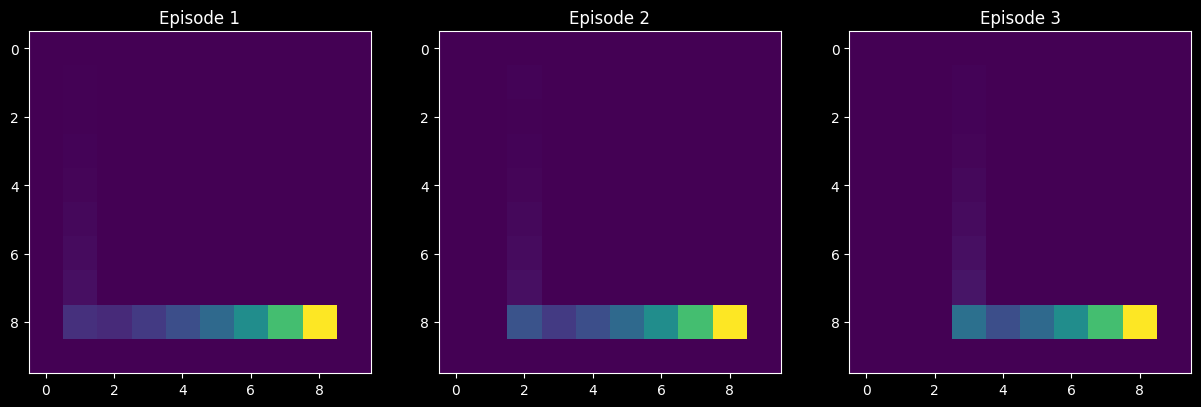

In [4]:
plt.figure(figsize=(15, 5))
n_tr = min(3, len(episode_1))
for n, X in enumerate(episode_1[:n_tr]):
    plt.subplot(1, n_tr, n + 1)
    y = ehc.sequence(X, δ=0.7)
    plt.imshow(y.T, cmap="viridis")
    plt.title(f"Episode {n+1}")
plt.show()

In [5]:
experiment = [
    [e.reshape(e.shape[0], -1).astype(np.float64) for e in episode]
    for episode in [episode_1, episode_2]
]

In [6]:
settings = ehc.GenSettings(δ=0.7, τ=0.9, c=0.4, γ=0.1, λ=0.1)
model = ehc.baseline(experiment, [0.1] * 2, 100, settings)

/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/equations.py:118: RuntimeWarning: divide by zero encountered in log
  δ = utils.kronecker_delta(ξ_index, np.log(x))
/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/equations.py:86: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  ξn = np.random.multivariate_normal(μ, Σ)  # Noisy observation
/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/equations.py:118: RuntimeWarning: invalid value encountered in log
  δ = utils.kronecker_delta(ξ_index, np.log(x))


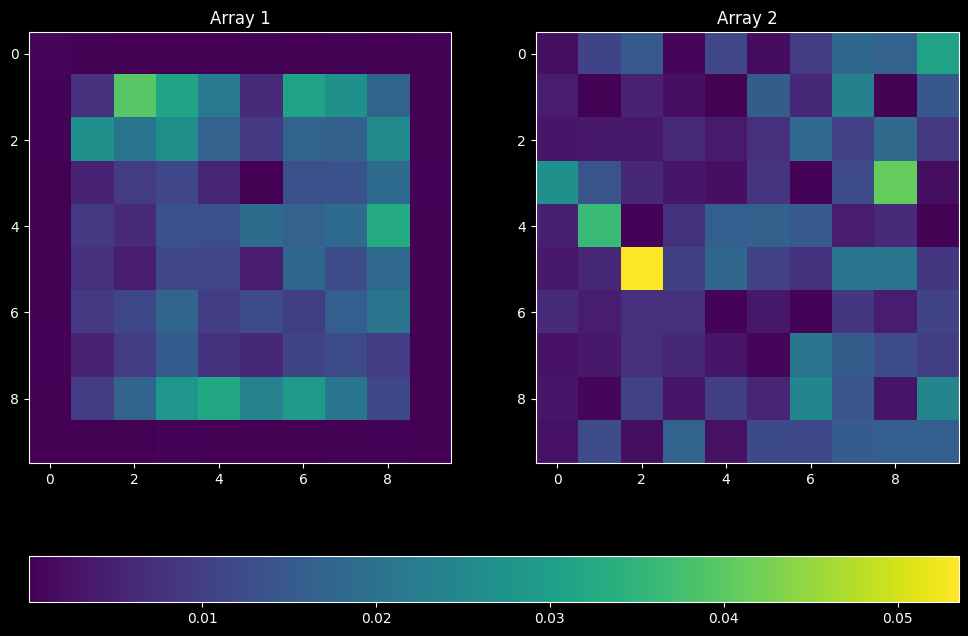

In [7]:
Θ = model.sample_maps()
map_1 = Θ[0].reshape(10, 10).T
map_2 = Θ[1].reshape(10, 10).T

plot_style = dict(
    cmap="viridis",
    aspect="auto",
    vmin=np.nanmin([map_1, map_2]),
    vmax=np.nanmax([map_1, map_2]),
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
cax1 = ax1.imshow(map_1, **plot_style)
cax2 = ax2.imshow(map_2, **plot_style)

fig.colorbar(cax1, ax=[ax1, ax2], orientation="horizontal")
ax1.set_title("Array 1"), ax2.set_title("Array 2")
plt.show()